In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.svm import LinearSVC
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, precision_score,recall_score, f1_score, precision_recall_curve
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
import nltk

In [3]:
from nltk.probability import ConditionalFreqDist
from nltk.corpus import webtext
from nltk.corpus import wordnet as wn


from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import PorterStemmer
#COsine similarity
from sklearn.metrics.pairwise import cosine_similarity



In [4]:
tweet_data = pd.read_csv('NB_validation.csv')

In [5]:
print(tweet_data.shape)
print(tweet_data.size)

(3534, 2)
7068


In [6]:
tweet_data.head(15)

,text,sentiment
0,last session day,2
1,shanghai also really exciting precisely skysc...,1
2,recession hit veronique branquinho quit compan...,0
3,happy bday,2
4,like it,1
5,thats great weee visitors,0
6,think everyone hates lol,0
7,soooooo wish could im school myspace completel...,2
8,within short time last clue,0
9,get day alright havent done anything yet leavi...,2


In [7]:
tweet_data.isna().sum()

text         3
sentiment    0
dtype: int64

In [8]:
tweet_data=tweet_data.dropna()

In [9]:
tweet_data.isna().sum()

text         0
sentiment    0
dtype: int64

In [10]:
print(tweet_data.shape)
print(tweet_data.size)

(3531, 2)
7062


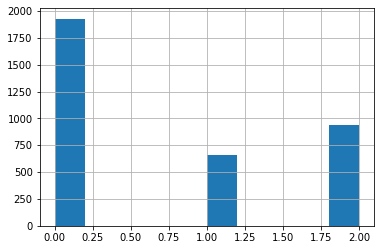

In [11]:
tweet_data['sentiment'].hist()

In [12]:
# mapping categorical data to number
def mapping_cat_to_num(col_name):
    tweet_data[col_name].unique()
    col_list = list(tweet_data[col_name].unique())
    col_dict = {}
    for i in range (len(col_list)):
        col_dict[col_list[i]] = i
    return col_dict


clean_nums={}
clean_nums =mapping_cat_to_num('sentiment')
clean_nums

{2: 0, 1: 1, 0: 2}

In [13]:
tweet_data.replace(clean_nums,inplace=True)

In [14]:
tweet_data.head()

,text,sentiment
0,last session day,0
1,shanghai also really exciting precisely skysc...,1
2,recession hit veronique branquinho quit compan...,2
3,happy bday,0
4,like it,1


In [15]:
tweet_data['sentiment'].astype('float').tail()

3529    2.0
3530    0.0
3531    2.0
3532    2.0
3533    0.0
Name: sentiment, dtype: float64

In [16]:
tweet_data['sentiment'].value_counts()

2    1928
0     942
1     661
Name: sentiment, dtype: int64

In [17]:
tweet_data['text'] = tweet_data['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
tweet_data['text'].head()

0                                     last session day
1    shanghai also really exciting precisely skyscr...
2    recession hit veronique branquinho quit compan...
3                                           happy bday
4                                              like it
Name: text, dtype: object

In [18]:
#stopwords
from nltk.corpus import stopwords
tweet_data['text'] = tweet_data['text'].apply(lambda x : ' '.join([word for word in x.split() 
                                                                   if not word in set(stopwords.words('english'))]))

In [19]:
import re
import string

#Citation: Borrowed a few regex'es from Google
def process_tweets(text):
    text = str(text).lower() #lower
    text = re.sub('\[.*?\]', '', text) #Remove text in square brackets
    text = re.sub('https?://\S+|www\.\S+', '', text) #Hyperlinks removal
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) #punctuations
    text = re.sub('\n', '', text) #newlines
    text = re.sub('\w*\d\w*', '', text) #word containing numbers
    return text

In [20]:
#Pre-process the tweets
tweet_data['text'] = tweet_data['text'].apply(lambda x:process_tweets(x))

In [21]:
tweet_data['text'].tail()

3529                              im tired cant sleep try
3530    alone old house thanks net keeps alive kicking...
3531    know mean little dog sinking depression wants ...
3532           sutra next youtube video gonna love videos
3533                               omgssh ang cute ng bby
Name: text, dtype: object

In [22]:
#Stemming
stemmer = PorterStemmer()
tokenized_tweet = tweet_data['text'].apply(lambda x: x.split()) 
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) 
print(tokenized_tweet.head())
tweets_training_set = []
for item in tokenized_tweet:
    tweets_training_set.append(' '.join(item))
print (len(tweets_training_set))

0                                 [last, session, day]
1    [shanghai, also, realli, excit, precis, skyscr...
2    [recess, hit, veroniqu, branquinho, quit, comp...
3                                        [happi, bday]
4                                               [like]
Name: text, dtype: object
3531


In [23]:
tweet_data.head()

,text,sentiment
0,last session day,0
1,shanghai also really exciting precisely skyscr...,1
2,recession hit veronique branquinho quit compan...,2
3,happy bday,0
4,like,1


In [24]:
tweet_data['Analyzed_Tweet'] = tweets_training_set
tweet_data.head()

,text,sentiment,Analyzed_Tweet
0,last session day,0,last session day
1,shanghai also really exciting precisely skyscr...,1,shanghai also realli excit precis skyscrap gal...
2,recession hit veronique branquinho quit compan...,2,recess hit veroniqu branquinho quit compani shame
3,happy bday,0,happi bday
4,like,1,like


In [25]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3531 entries, 0 to 3533
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   text            3531 non-null   object
 1   sentiment       3531 non-null   int64 
 2   Analyzed_Tweet  3531 non-null   object
dtypes: int64(1), object(2)
memory usage: 110.3+ KB


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer


## Naive Bayes

In [27]:
TfidfVectorizer()

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [28]:
# TfTfidfVectorizer()
TFIDF_vector = TfidfVectorizer(max_features=3000) 
X = TFIDF_vector.fit_transform(tweet_data['text'].tolist()).toarray()

X_train, X_test, y_train, y_test = train_test_split(X, tweet_data['sentiment'], test_size = 0.20, random_state = 2)


from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 

naive_bayes = MultinomialNB().fit(X_train, y_train)

y_pred=naive_bayes.predict(X_test)

print("Accuracy\n",accuracy_score(y_test, y_pred))
print("\n\nCOnfusion Matrix\n",confusion_matrix(y_test, y_pred))
print("\n\nClassification Report\n",classification_report(y_test, y_pred))

Accuracy
 0.6181046676096181


COnfusion Matrix
 [[ 48   0 137]
 [  4  11 120]
 [  9   0 378]]


Classification Report
               precision    recall  f1-score   support

           0       0.79      0.26      0.39       185
           1       1.00      0.08      0.15       135
           2       0.60      0.98      0.74       387

    accuracy                           0.62       707
   macro avg       0.79      0.44      0.43       707
weighted avg       0.72      0.62      0.54       707



In [29]:
CountVectorizer()

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [30]:
#changing the vector
count_vector = CountVectorizer(max_features=3000) 
X = count_vector.fit_transform(tweet_data['text'].tolist()).toarray()

X_train, X_test, y_train, y_test = train_test_split(X, tweet_data['sentiment'], test_size = 0.20, random_state = 2)

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 

naive_bayes = MultinomialNB().fit(X_train, y_train)

y_pred=naive_bayes.predict(X_test)

print("Accuracy\n",accuracy_score(y_test, y_pred))
print("\n\nCOnfusion Matrix\n",confusion_matrix(y_test, y_pred))
print("\n\nClassification Report\n",classification_report(y_test, y_pred))

Accuracy
 0.669024045261669


COnfusion Matrix
 [[101  12  72]
 [ 18  49  68]
 [ 35  29 323]]


Classification Report
               precision    recall  f1-score   support

           0       0.66      0.55      0.60       185
           1       0.54      0.36      0.44       135
           2       0.70      0.83      0.76       387

    accuracy                           0.67       707
   macro avg       0.63      0.58      0.60       707
weighted avg       0.66      0.67      0.66       707

